In [1]:
from GPA1D import GPA1D
from GPA import GPA
import numpy as np
import chi
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
import seaborn as sns 

In [2]:
ga = GPA1D(splitWidth=16,spaceFilling='hilbert')

In [3]:
ga2 = GPA()

In [4]:
a = np.arange(16).reshape(4,4).astype(float)
ga2(a,moment=['G1C','G2','G3'])

{'G1C': 1.0625, 'G2': 0.4999999999999999, 'G3': 0.8200314258455798}

# P-Model

In [6]:
series, _, _ = chi.generateUniformEndo(4096)
res = ga(series)

0.500016512526122


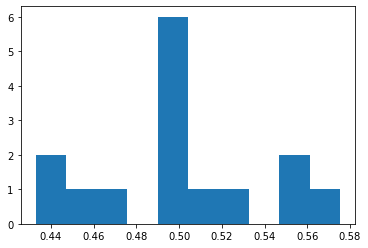

In [7]:
plt.figure()
plt.hist(res['G2'])
print(np.average(res['G2']))
plt.show()

In [7]:
series, _, _ = chi.generateUniformExo(4096)
res = ga(series)

0.20306505469980507


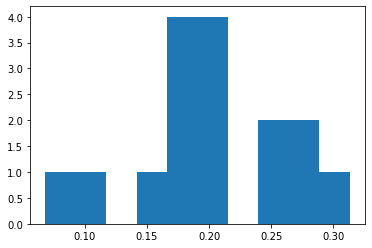

In [8]:
plt.figure()
plt.hist(res['G2'])
print(np.average(res['G2']))
plt.show()

pts

# Testing scales

In [5]:
series, _, _ = chi.generateUniformEndo(4096)
pts = []
for sw in range(3,17,2):
    ga = GPA1D(splitWidth=sw,spaceFilling='hilbert')
    res = ga(series)
    res['scale'] = sw
    pts.append(res)

pts = pd.concat(pts, ignore_index=True)
pts

,G1C,G1,G2,G3,G4,scale
0,1.222222,0.201101,0.870289,0.512293,0.343178+1.589125j,3
1,1.111111,0.176461,0.684138,0.809317,-0.372091+0.549380j,3
2,1.000000,0.294553,0.653583,0.490753,0.880653-0.011343j,3
3,0.875000,0.202727,0.895846,0.823352,0.929714+0.512689j,3
4,0.833333,0.235726,0.572449,0.788694,1.496639-0.771629j,3
...,...,...,...,...,...,...
821,1.797619,0.176146,0.365127,0.480542,1.340332-0.476255j,15
822,1.850000,0.128801,0.426635,0.484163,0.690408+0.422233j,15
823,1.844660,0.121279,0.459323,0.525636,0.710465-0.348617j,15
824,1.883495,0.126401,0.462631,0.450803,0.743850+0.126717j,15


In [6]:
series, _, _ = chi.generateUniformExo(4096)
pts = []
for sw in range(3,17,2):
    ga = GPA1D(splitWidth=sw,spaceFilling='hilbert')
    res = ga(series)
    res['scale'] = sw
    pts.append(res)

pts = pd.concat(pts, ignore_index=True)
pts1 = pts.groupby('scale',as_index=False).mean()
pts1

,scale,G1C,G1,G2,G3,G4
0,3,0.957921,0.241649,0.723321,0.714836,0.897447+0.183098j
1,5,1.331597,0.275134,0.618797,0.620109,0.847969+0.072307j
2,7,1.430068,0.298800,0.454202,0.518660,0.805642+0.070788j
3,9,1.427629,0.307009,0.320430,0.454007,0.828699+0.305494j
4,11,1.458610,0.333457,0.273963,0.420298,0.716203+0.175167j
5,13,1.547444,0.294675,0.260573,0.410799,0.921780+0.079873j
6,15,1.522045,0.314499,0.216423,0.381215,0.811565+0.153235j


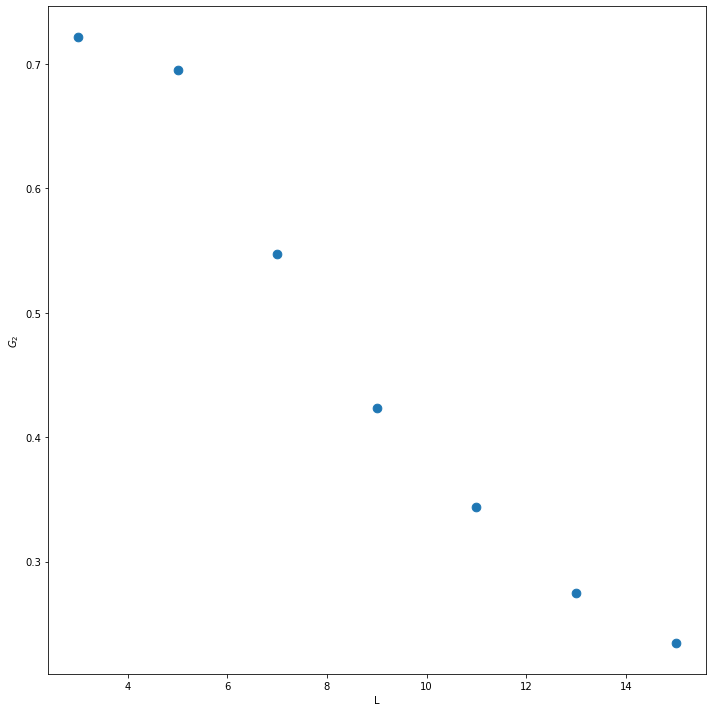

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(pts1['scale'], pts1['G2'], marker ='.',s=300)
plt.xlabel("L")
plt.ylabel(r"$G_2$")
plt.tight_layout()
plt.show()


In [7]:
series, _, _ = chi.generateUniformEndo(4096)
pts = []
for sw in range(3,17,2):
    ga = GPA1D(splitWidth=sw,spaceFilling='hilbert')
    res = ga(series)
    res['scale'] = sw
    pts.append(res)

pts = pd.concat(pts, ignore_index=True)
pts2 = pts.groupby('scale',as_index=False).mean()
pts

,G1C,G1,G2,G3,G4,scale
0,0.857143,0.387664,0.688905,0.783041,1.201368+0.119843j,3
1,1.111111,0.343791,0.730707,0.732436,1.872849+0.045346j,3
2,0.750000,0.193763,0.677880,0.804404,1.285021+1.841055j,3
3,0.888889,0.133540,0.669228,0.899624,1.604318-0.718316j,3
4,0.000000,0.000000,0.000000,0.000000,0.000000+0.000000j,3
...,...,...,...,...,...,...
821,1.800000,0.185241,0.231454,0.362032,0.498630-0.354365j,15
822,1.869159,0.124129,0.454348,0.474779,1.340366-0.624857j,15
823,1.860215,0.120266,0.414104,0.467042,1.002449+0.357124j,15
824,1.895652,0.105948,0.493941,0.508387,0.648816+0.836728j,15


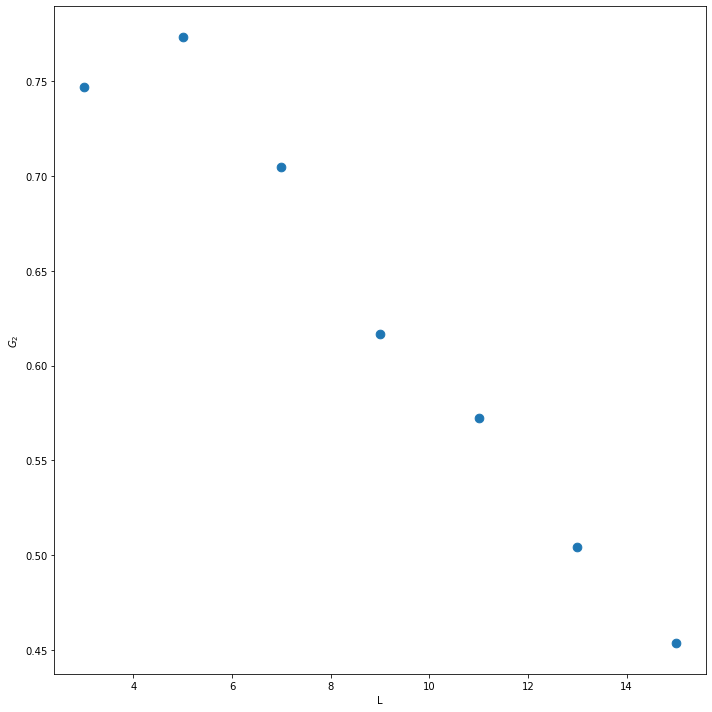

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(pts2['scale'], pts2['G2'], marker ='.',s=300)
plt.xlabel("L")
plt.ylabel(r"$G_2$")
plt.tight_layout()
plt.show()


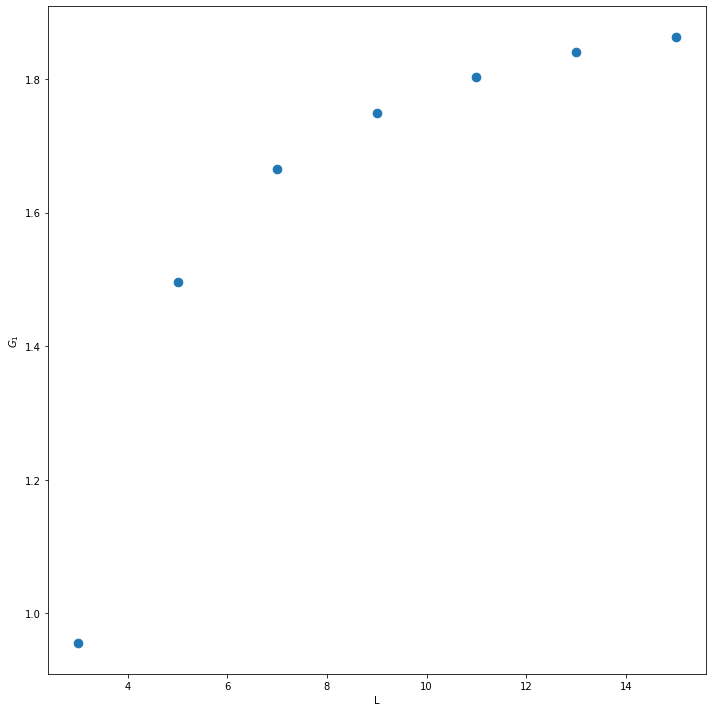

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(pts2['scale'], pts2['G1C'], marker ='.',s=300)
plt.xlabel("L")
plt.ylabel(r"$G_1$")
plt.tight_layout()
plt.show()


In [22]:
plt.figure(figsize=(10,10))
plt.scatter(pts1['scale'], pts1['G2'], marker ='.',s=300)
plt.scatter(pts2['scale'], pts2['G2'], marker ='.',s=300)
fit = np.polyfit(np.log(pts1['scale']), np.log(pts1['G2']),1)
print(fit)

y2 = np.polyval(fit, np.log(pts1['scale']))
print(np.exp(y2))
plt.plot( pts2['scale'], np.exp(y2), color='red')

fit = np.polyfit(np.log(pts2['scale']), np.log(pts2['G2']),1)
print(fit)

y2 = np.polyval(fit, np.log(pts2['scale']))
print(np.exp(y2))
plt.plot( pts2['scale'], np.exp(y2), color='red')

plt.xlabel("L",fontsize=20)
plt.ylabel(r"$G_2$",fontsize=20)
plt.tight_layout()
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()


NameError: name 'pts1' is not defined

<Figure size 720x720 with 0 Axes>

100%|█████████████████████████████████████████| 100/100 [13:19<00:00,  8.00s/it]


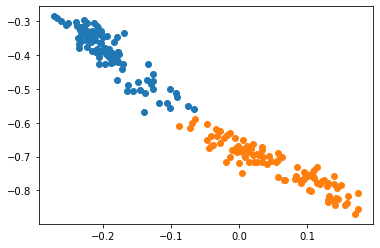

In [10]:
endo,exo = [] , []
for i in tqdm.tqdm(range(100)):
    series, _, _ = chi.generateUniformEndo(4096)
    g1c = GPA1D.scalingLaw(series,"G1C")
    g1 = GPA1D.scalingLaw(series,"G1")
    g2 = GPA1D.scalingLaw(series,"G2")
    g3 = GPA1D.scalingLaw(series,"G3")
    endo.append({"G1C":g1c,"G1":g1,"G2":g2,"G3":g3})
    
    series, _, _ = chi.generateUniformExo(4096)
    g1c = GPA1D.scalingLaw(series,"G1C")
    g1 = GPA1D.scalingLaw(series,"G1")
    g2 = GPA1D.scalingLaw(series,"G2")
    g3 = GPA1D.scalingLaw(series,"G3")
    exo.append({"G1C":g1c,"G1":g1,"G2":g2,"G3":g3})

endo,exo = pd.DataFrame(endo),pd.DataFrame(exo)
plt.figure()
plt.scatter(endo["G1"],endo["G2"])
plt.scatter(exo["G1"],exo["G2"])
plt.show()

100%|█████████████████████████████████████████| 100/100 [02:55<00:00,  1.76s/it]


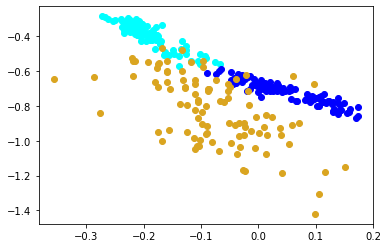

In [11]:
lor = []
for i in tqdm.tqdm(range(100)):
    mu = 2 + 4*np.random.rand()
    t, r= chi.lorenzSynch(mu=mu, n=2**10+100)
    g1c = GPA1D.scalingLaw(r,"G1C")
    g1 = GPA1D.scalingLaw(r,"G1")
    g2 = GPA1D.scalingLaw(r,"G2")
    g3 = GPA1D.scalingLaw(r,"G3")
    lor.append({"G1C":g1c,"G1":g1,"G2":g2,"G3":g3})
lor = pd.DataFrame(lor)
plt.figure()
plt.scatter(endo["G1"],endo["G2"],color='cyan')
plt.scatter(exo["G1"],exo["G2"],color='blue')
plt.scatter(lor["G1"],lor["G2"],color='goldenrod')
plt.show()

100%|█████████████████████████████████████████| 100/100 [34:42<00:00, 20.83s/it]


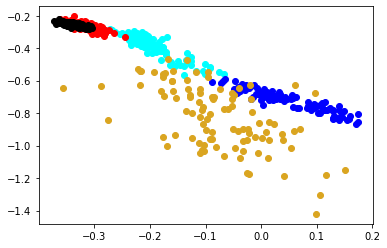

In [12]:
rn,wn = [],[]
for i in tqdm.tqdm(range(100)):
    r = chi.cNoise(2,[2**13])
    g1c = GPA1D.scalingLaw(r,"G1C")
    g1 = GPA1D.scalingLaw(r,"G1")
    g2 = GPA1D.scalingLaw(r,"G2")
    g3 = GPA1D.scalingLaw(r,"G3")
    rn.append({"G1C":g1c,"G1":g1,"G2":g2,"G3":g3})
    
    w = chi.cNoise(0,[2**13])
    g1c = GPA1D.scalingLaw(r,"G1C")
    g1 = GPA1D.scalingLaw(w,"G1")
    g2 = GPA1D.scalingLaw(w,"G2")
    g3 = GPA1D.scalingLaw(w,"G3")
    wn.append({"G1C":g1c,"G1":g1,"G2":g2,"G3":g3})

rn = pd.DataFrame(rn)
wn = pd.DataFrame(wn)

plt.figure()
plt.scatter(endo["G1"],endo["G2"],color='cyan')
plt.scatter(exo["G1"],exo["G2"],color='blue')
plt.scatter(lor["G1"],lor["G2"],color='goldenrod')
plt.scatter(rn["G1"],rn["G2"],color='red')
plt.scatter(wn["G1"],wn["G2"],color='black')
plt.show()

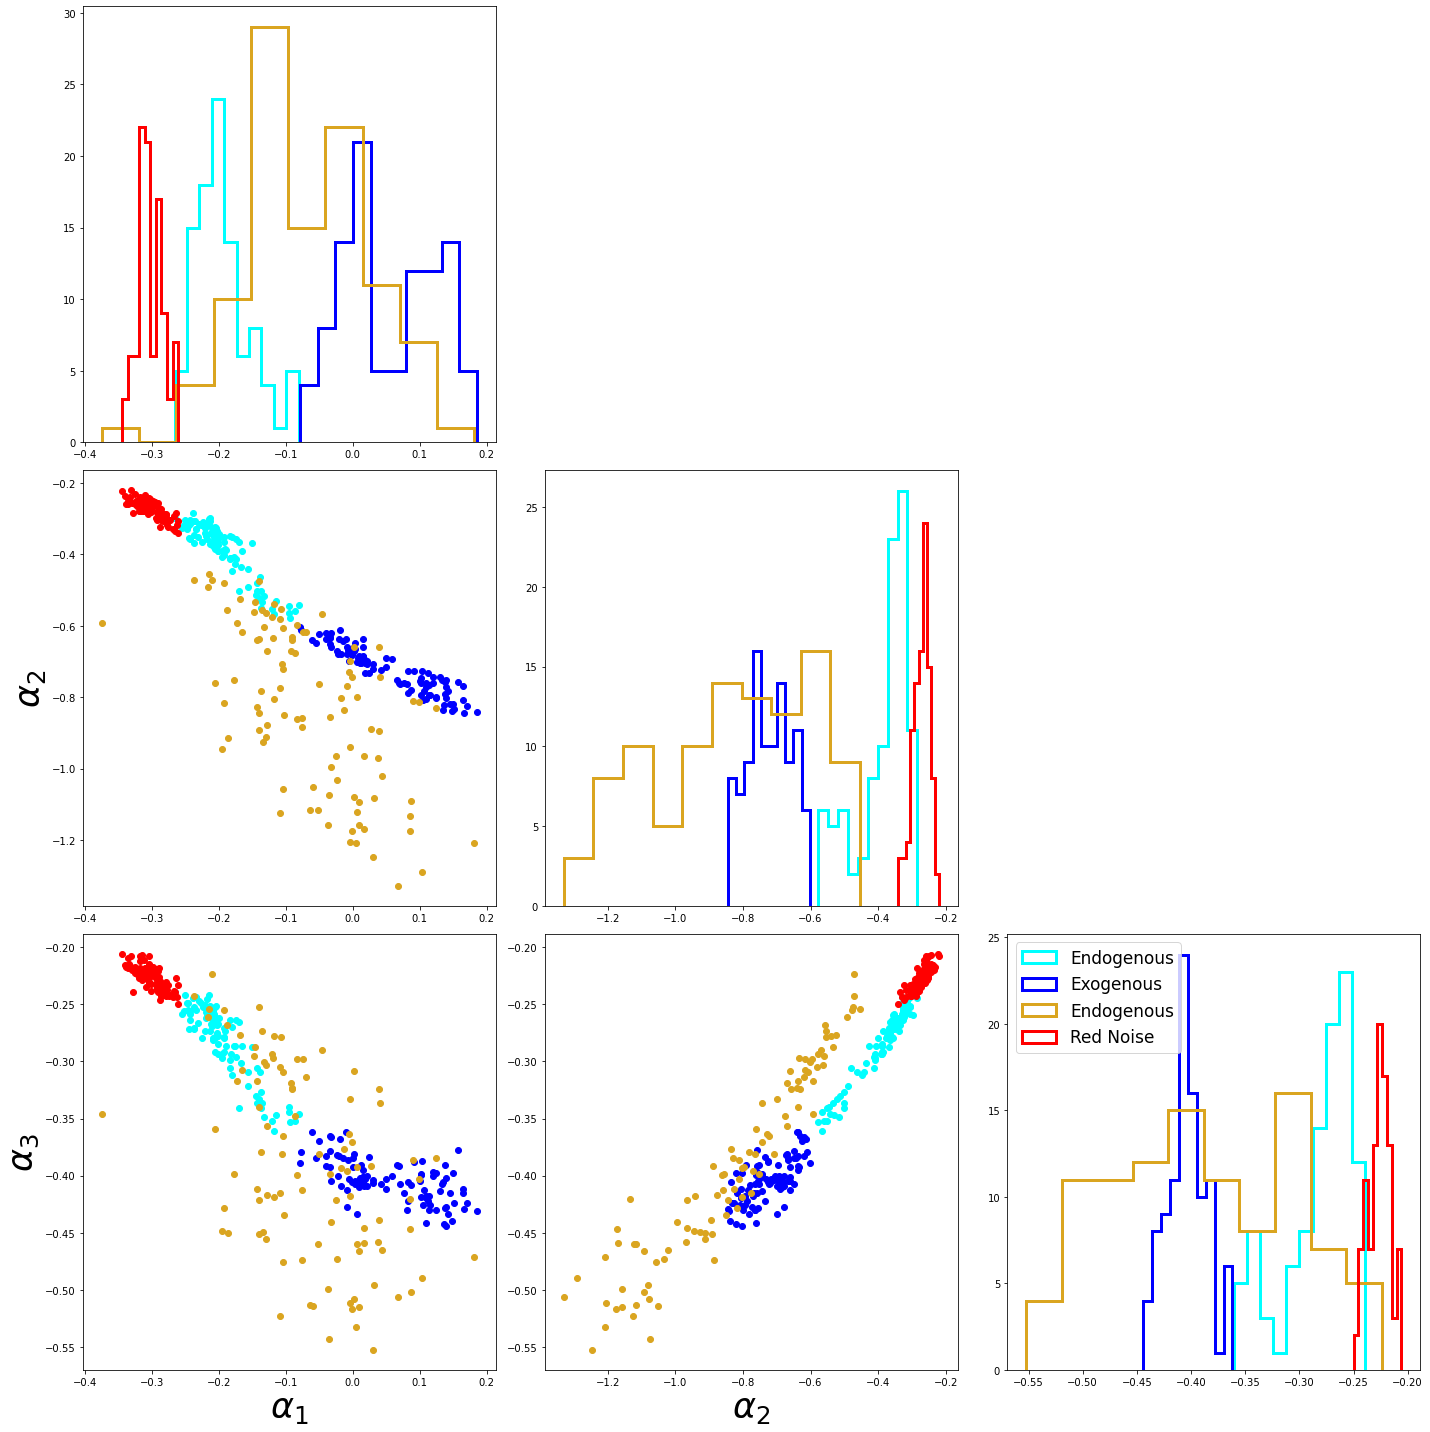

In [57]:
plt.figure(figsize=(20,20))
for i in range(3):
    for j in range(3):
        if i<j:
            plt.subplot(3,3,i+3*j+1)
            plt.scatter(endo[f"G{i+1}"],endo[f"G{j+1}"],color='cyan',label='Endogenous')
            plt.scatter(exo[f"G{i+1}"],exo[f"G{j+1}"],color='blue',label='Exogenous')
            plt.scatter(lor[f"G{i+1}"],lor[f"G{j+1}"],color='goldenrod',label='Endogenous')
            plt.scatter(rn[f"G{i+1}"],rn[f"G{j+1}"],color='red',label='Red Noise')
            #plt.scatter(wn["G1"],wn["G2"],color='black')
            if j==2:
                plt.xlabel(fr"$\alpha_{i+1}$",fontsize=35)
            if i==0:
                plt.ylabel(fr"$\alpha_{j+1}$",fontsize=35)
        if i==j:
            plt.subplot(3,3,i+3*j+1)
            plt.hist(endo[f"G{i+1}"],color='cyan',label='Endogenous',histtype='step',lw=3)
            plt.hist(exo[f"G{i+1}"],color='blue',label='Exogenous',histtype='step',lw=3)
            plt.hist(lor[f"G{i+1}"],color='goldenrod',label='Endogenous',histtype='step',lw=3)
            plt.hist(rn[f"G{i+1}"],color='red',label='Red Noise',histtype='step',lw=3)
            #plt.scatter(wn["G1"],wn["G2"],color='black')
            #plt.title(fr"$\alpha_{j+1}$",fontsize=25)
plt.legend(fontsize=17)
plt.tight_layout()

plt.show()

In [62]:
endo['G2']

0    -0.316997
1    -0.401799
2    -0.391499
3    -0.531187
4    -0.306875
        ...   
95   -0.550346
96   -0.480873
97   -0.327139
98   -0.389042
99   -0.502277
Name: G2, Length: 100, dtype: float64

In [13]:
endo.to_csv("endo_Hilbert_3_17_2.csv", index=False)
exo.to_csv("exo_Hilbert_3_17_2.csv", index=False)
lor.to_csv("lor_Hilbert_3_17_2.csv", index=False)
rn.to_csv("rn_Hilbert_3_17_2.csv", index=False)

In [10]:
endo = pd.read_csv("endo_Hilbert_3_17_2.csv")
exo = pd.read_csv("exo_Hilbert_3_17_2.csv")
lor = pd.read_csv("lor_Hilbert_3_17_2.csv")
rn = pd.read_csv("rn_Hilbert_3_17_2.csv")

In [22]:
sw = chi.get_SolarWind()
ssw = chi.get_SurrogateSolarWind()

array([ 0.        ,  0.03909406,  0.03460539, ..., -0.10205233,
       -0.0185812 ,  0.10900451])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


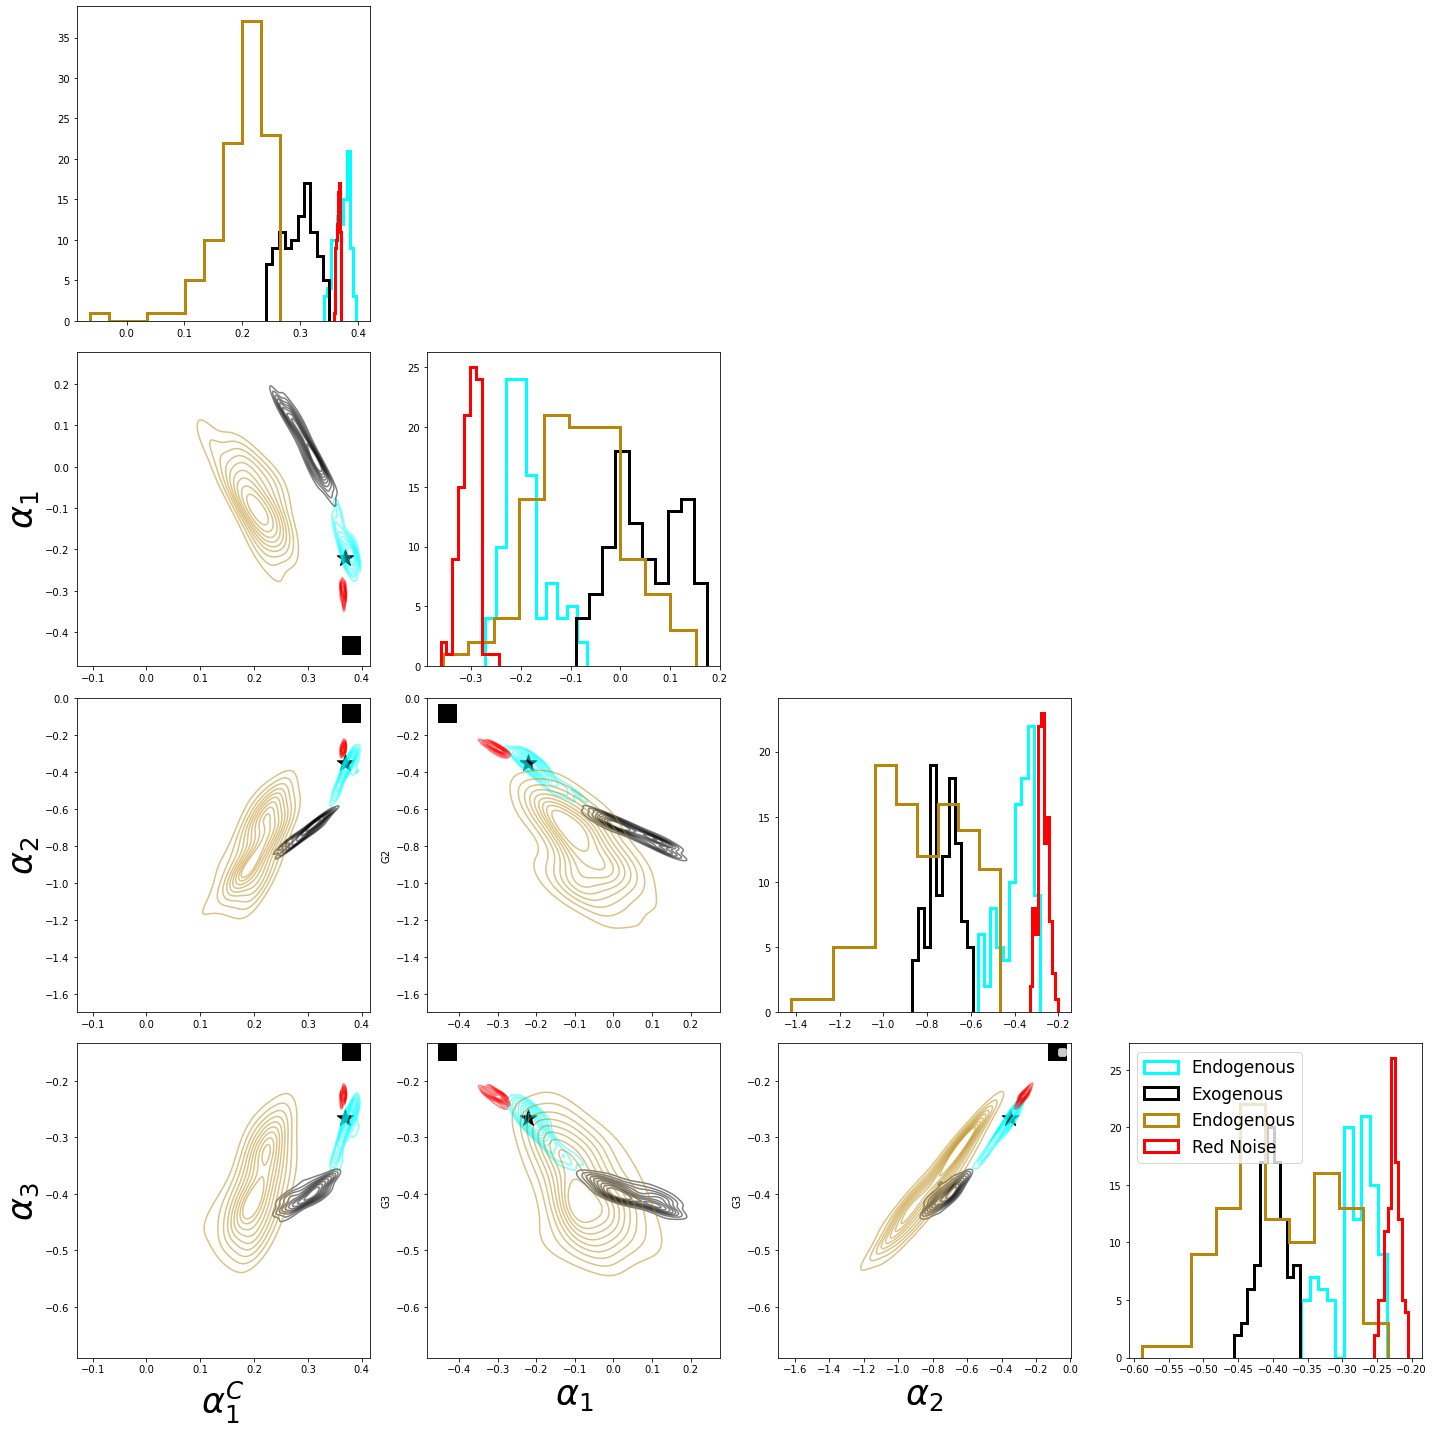

In [33]:
plt.figure(figsize=(20,20))

gress = ['G1C','G1','G2','G3']
labels = [f'_1^C',f'_1',f'_2',f'_3']

for i in range(4):
    for j in range(4):
        if ((i==3) and (j==0)):
            plt.legend()
        if i<j:
            plt.subplot(4,4,i+4*j+1)
            sns.kdeplot(data=endo, x=gress[i], y=gress[j],fill=False,color='aqua',thresh=0.15,alpha = 0.5)
            sns.kdeplot(data=exo, x=gress[i], y=gress[j],fill=False,color='black',thresh=0.15,alpha = 0.5)
            sns.kdeplot(data=lor, x=gress[i], y=gress[j],fill=False,color='darkgoldenrod',thresh=0.15,alpha = 0.5)
            sns.kdeplot(data=rn, x=gress[i], y=gress[j],fill=False,color='red',thresh=0.15,alpha = 0.5)
            gx = GPA1D.scalingLaw(sw,gress[i])
            gy = GPA1D.scalingLaw(sw,gress[j])
            plt.scatter(gx,gy,marker='*',s=300, color='k')
            gx = GPA1D.scalingLaw(ssw,gress[i])
            gy = GPA1D.scalingLaw(ssw,gress[j])
            plt.scatter(gx,gy,marker='s',s=300, color='k')
            plt.title('')
            if j==0:
                plt.xlim(0.1,0.4)
            if j==3:
                plt.xlabel(fr"$\alpha"+labels[i]+"$",fontsize=35)
            else:
                plt.xlabel('')
            if i==0:
                plt.ylabel(fr"$\alpha"+labels[j]+"$",fontsize=35)
        if i==j:
            plt.subplot(4,4,i+4*j+1)
            plt.hist(endo[gress[i]],color='aqua',label='Endogenous',histtype='step',lw=3)
            plt.hist(exo[gress[i]],color='black',label='Exogenous',histtype='step',lw=3)
            plt.hist(lor[gress[i]],color='darkgoldenrod',label='Endogenous',histtype='step',lw=3)
            plt.hist(rn[gress[i]],color='red',label='Red Noise',histtype='step',lw=3)
            #plt.scatter(wn["G1"],wn["G2"],color='black')
            #plt.title(fr"$\alpha_{j+1}$",fontsize=25)
plt.legend(fontsize=17)
plt.tight_layout()

plt.show()

# Traditional

100%|█████████████████████████████████████████| 100/100 [13:32<00:00,  8.13s/it]


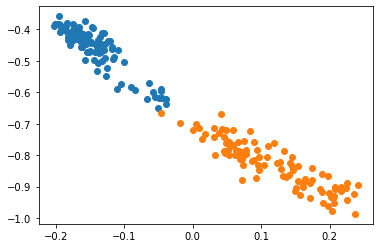

In [11]:
endo,exo = [] , []
for i in tqdm.tqdm(range(100)):
    series, _, _ = chi.generateUniformEndo(4096)
    g1c = GPA1D.scalingLaw(series,"G1C",spaceFilling='reshape')
    g1 = GPA1D.scalingLaw(series,"G1",spaceFilling='reshape')
    g2 = GPA1D.scalingLaw(series,"G2",spaceFilling='reshape')
    g3 = GPA1D.scalingLaw(series,"G3",spaceFilling='reshape')
    endo.append({"G1C":g1c,"G1":g1,"G2":g2,"G3":g3})
    
    series, _, _ = chi.generateUniformExo(4096)
    g1c = GPA1D.scalingLaw(series,"G1C",spaceFilling='reshape')
    g1 = GPA1D.scalingLaw(series,"G1",spaceFilling='reshape')
    g2 = GPA1D.scalingLaw(series,"G2",spaceFilling='reshape')
    g3 = GPA1D.scalingLaw(series,"G3",spaceFilling='reshape')
    exo.append({"G1C":g1c,"G1":g1,"G2":g2,"G3":g3})

endo,exo = pd.DataFrame(endo),pd.DataFrame(exo)
plt.figure()
plt.scatter(endo["G1"],endo["G2"])
plt.scatter(exo["G1"],exo["G2"])
plt.show()

100%|█████████████████████████████████████████| 100/100 [02:48<00:00,  1.69s/it]


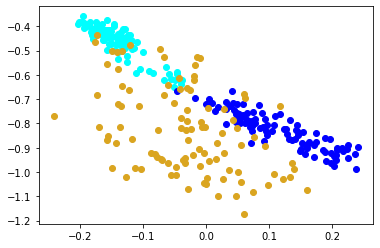

In [12]:
lor = []
for i in tqdm.tqdm(range(100)):
    mu = 2 + 4*np.random.rand()
    t, r= chi.lorenzSynch(mu=mu, n=2**10+100)
    g1c = GPA1D.scalingLaw(r,"G1C",spaceFilling='reshape')
    g1 = GPA1D.scalingLaw(r,"G1",spaceFilling='reshape')
    g2 = GPA1D.scalingLaw(r,"G2",spaceFilling='reshape')
    g3 = GPA1D.scalingLaw(r,"G3",spaceFilling='reshape')
    lor.append({"G1C":g1c,"G1":g1,"G2":g2,"G3":g3})
lor = pd.DataFrame(lor)
plt.figure()
plt.scatter(endo["G1"],endo["G2"],color='cyan')
plt.scatter(exo["G1"],exo["G2"],color='blue')
plt.scatter(lor["G1"],lor["G2"],color='goldenrod')
plt.show()

100%|█████████████████████████████████████████| 100/100 [30:33<00:00, 18.34s/it]


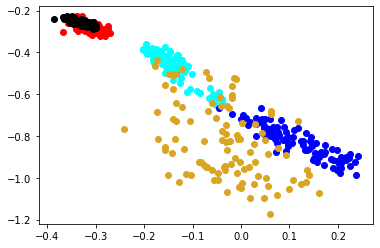

In [13]:
rn,wn = [],[]
for i in tqdm.tqdm(range(100)):
    r = chi.cNoise(2,[2**13])
    g1c = GPA1D.scalingLaw(r,"G1C",spaceFilling='reshape')
    g1 = GPA1D.scalingLaw(r,"G1",spaceFilling='reshape')
    g2 = GPA1D.scalingLaw(r,"G2",spaceFilling='reshape')
    g3 = GPA1D.scalingLaw(r,"G3",spaceFilling='reshape')
    rn.append({"G1C":g1c,"G1":g1,"G2":g2,"G3":g3})
    
    w = chi.cNoise(0,[2**13])
    g1c = GPA1D.scalingLaw(w,"G1C",spaceFilling='reshape')
    g1 = GPA1D.scalingLaw(w,"G1",spaceFilling='reshape')
    g2 = GPA1D.scalingLaw(w,"G2",spaceFilling='reshape')
    g3 = GPA1D.scalingLaw(w,"G3",spaceFilling='reshape')
    wn.append({"G1C":g1c,"G1":g1,"G2":g2,"G3":g3})

rn = pd.DataFrame(rn)
wn = pd.DataFrame(wn)

plt.figure()
plt.scatter(endo["G1"],endo["G2"],color='cyan')
plt.scatter(exo["G1"],exo["G2"],color='blue')
plt.scatter(lor["G1"],lor["G2"],color='goldenrod')
plt.scatter(rn["G1"],rn["G2"],color='red')
plt.scatter(wn["G1"],wn["G2"],color='black')
plt.show()

In [14]:
endo.to_csv("endo_lin_3_17_2.csv", index=False)
exo.to_csv("exo_lin_3_17_2.csv", index=False)
lor.to_csv("lor_lin_3_17_2.csv", index=False)
rn.to_csv("rn_lin_3_17_2.csv", index=False)

In [10]:
endo = pd.read_csv("endo_lin_3_17_2.csv")
exo = pd.read_csv("exo_lin_3_17_2.csv")
lor = pd.read_csv("lor_lin_3_17_2.csv")
rn = pd.read_csv("rn_lin_3_17_2.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


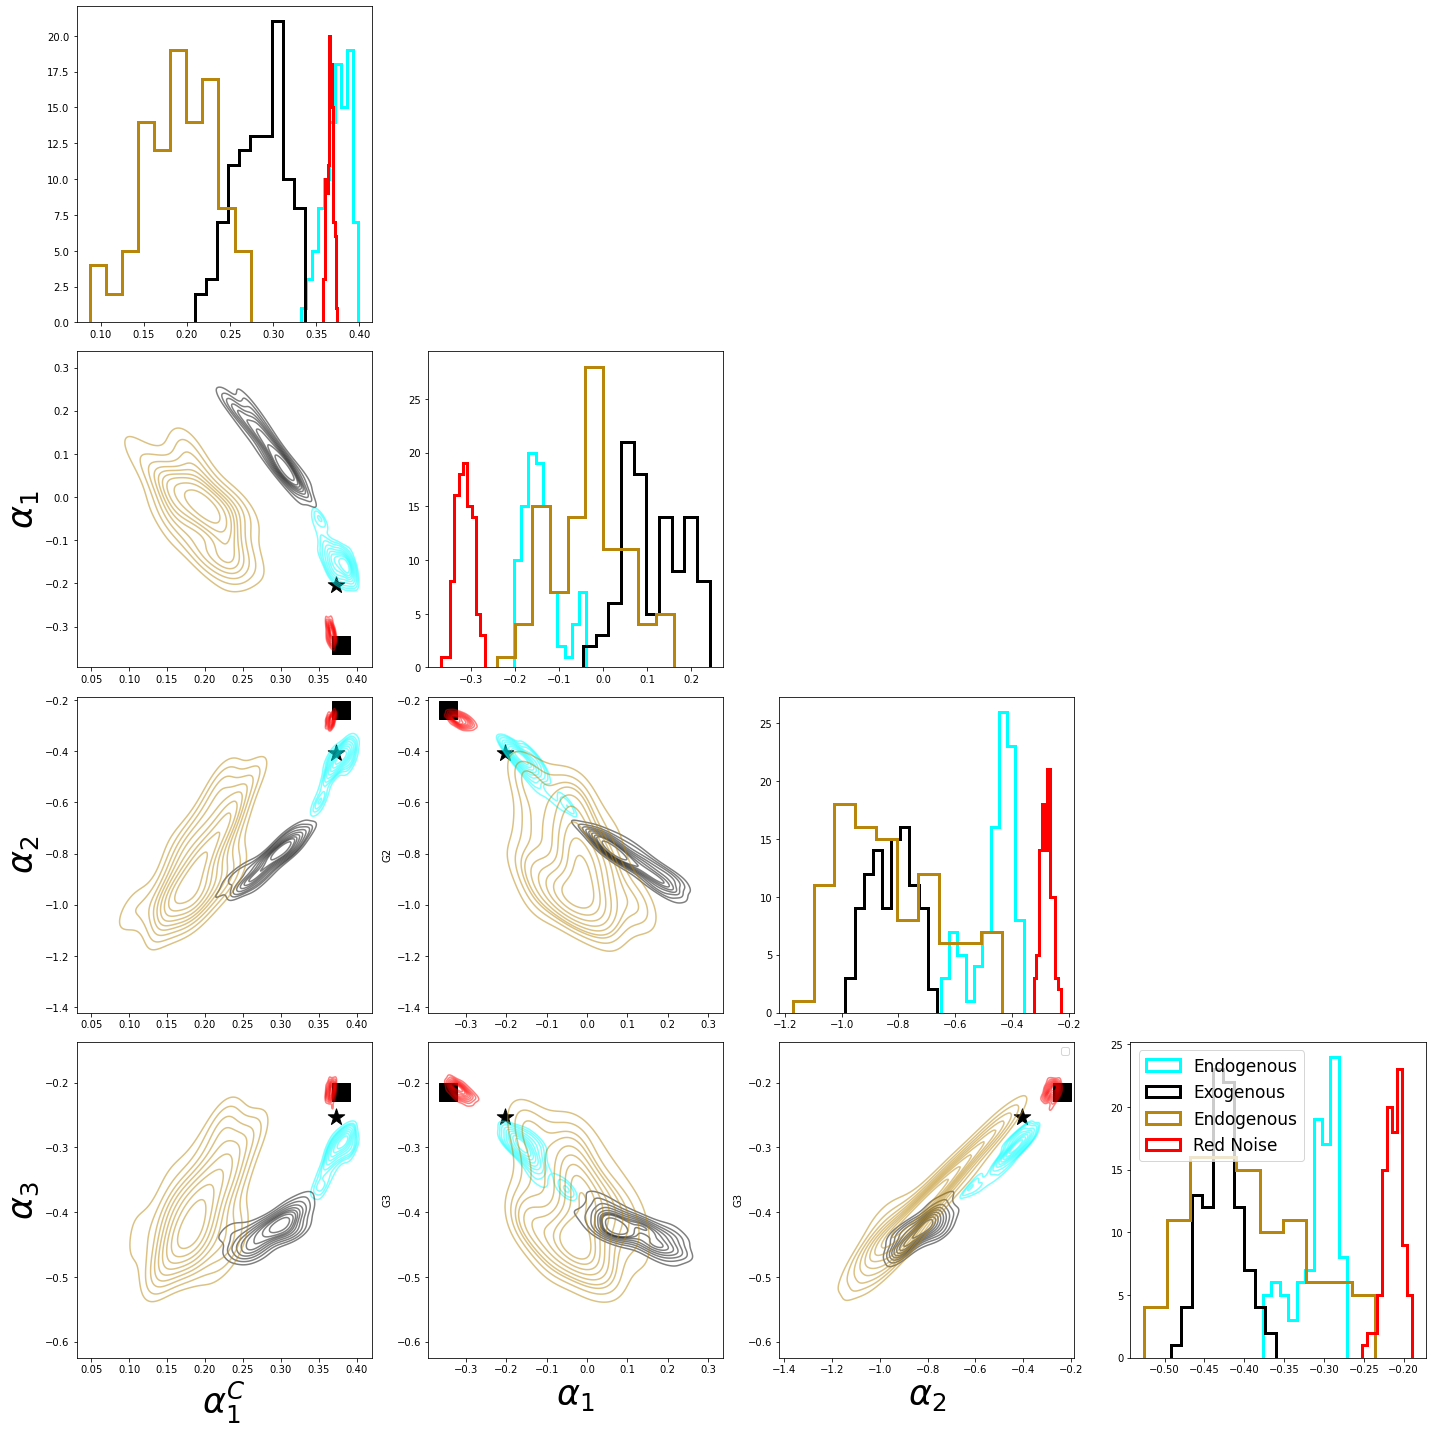

In [15]:
plt.figure(figsize=(20,20))

gress = ['G1C','G1','G2','G3']
labels = [f'_1^C',f'_1',f'_2',f'_3']

for i in range(4):
    for j in range(4):
        if ((i==3) and (j==0)):
            plt.legend()
        if i<j:
            plt.subplot(4,4,i+4*j+1)
            sns.kdeplot(data=endo, x=gress[i], y=gress[j],fill=False,color='aqua',thresh=0.15,alpha = 0.5)
            sns.kdeplot(data=exo, x=gress[i], y=gress[j],fill=False,color='black',thresh=0.15,alpha = 0.5)
            sns.kdeplot(data=lor, x=gress[i], y=gress[j],fill=False,color='darkgoldenrod',thresh=0.15,alpha = 0.5)
            sns.kdeplot(data=rn, x=gress[i], y=gress[j],fill=False,color='red',thresh=0.15,alpha = 0.5)
            gx = GPA1D.scalingLaw(sw,gress[i],spaceFilling='reshape')
            gy = GPA1D.scalingLaw(sw,gress[j],spaceFilling='reshape')
            plt.scatter(gx,gy,marker='*',s=300, color='k')
            gx = GPA1D.scalingLaw(ssw,gress[i],spaceFilling='reshape')
            gy = GPA1D.scalingLaw(ssw,gress[j],spaceFilling='reshape')
            plt.scatter(gx,gy,marker='s',s=300, color='k')
            plt.title('')
            if j==0:
                plt.xlim(0.1,0.4)
            if j==3:
                plt.xlabel(fr"$\alpha"+labels[i]+"$",fontsize=35)
            else:
                plt.xlabel('')
            if i==0:
                plt.ylabel(fr"$\alpha"+labels[j]+"$",fontsize=35)
        if i==j:
            plt.subplot(4,4,i+4*j+1)
            plt.hist(endo[gress[i]],color='aqua',label='Endogenous',histtype='step',lw=3)
            plt.hist(exo[gress[i]],color='black',label='Exogenous',histtype='step',lw=3)
            plt.hist(lor[gress[i]],color='darkgoldenrod',label='Endogenous',histtype='step',lw=3)
            plt.hist(rn[gress[i]],color='red',label='Red Noise',histtype='step',lw=3)
            #plt.scatter(wn["G1"],wn["G2"],color='black')
            #plt.title(fr"$\alpha_{j+1}$",fontsize=25)
plt.legend(fontsize=17)
plt.tight_layout()

plt.show()

# Snake curve

100%|█████████████████████████████████████████| 100/100 [13:39<00:00,  8.19s/it]


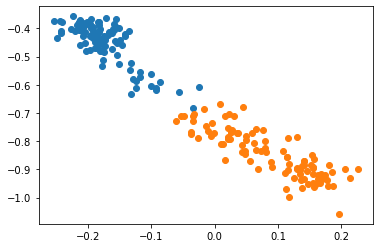

In [2]:
endo,exo = [] , []
for i in tqdm.tqdm(range(100)):
    series, _, _ = chi.generateUniformEndo(4096)
    g1c = GPA1D.scalingLaw(series,"G1C",spaceFilling='snake')
    g1 = GPA1D.scalingLaw(series,"G1",spaceFilling='snake')
    g2 = GPA1D.scalingLaw(series,"G2",spaceFilling='snake')
    g3 = GPA1D.scalingLaw(series,"G3",spaceFilling='snake')
    endo.append({"G1C":g1c,"G1":g1,"G2":g2,"G3":g3})
    
    series, _, _ = chi.generateUniformExo(4096)
    g1c = GPA1D.scalingLaw(series,"G1C",spaceFilling='snake')
    g1 = GPA1D.scalingLaw(series,"G1",spaceFilling='snake')
    g2 = GPA1D.scalingLaw(series,"G2",spaceFilling='snake')
    g3 = GPA1D.scalingLaw(series,"G3",spaceFilling='snake')
    exo.append({"G1C":g1c,"G1":g1,"G2":g2,"G3":g3})

endo,exo = pd.DataFrame(endo),pd.DataFrame(exo)
plt.figure()
plt.scatter(endo["G1"],endo["G2"])
plt.scatter(exo["G1"],exo["G2"])
plt.show()

100%|█████████████████████████████████████████| 100/100 [02:50<00:00,  1.70s/it]


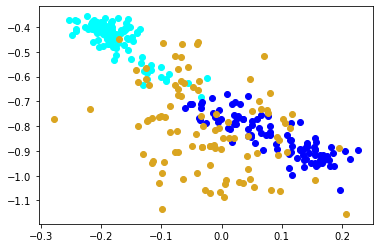

In [3]:
lor = []
for i in tqdm.tqdm(range(100)):
    mu = 2 + 4*np.random.rand()
    t, r= chi.lorenzSynch(mu=mu, n=2**10+100)
    g1c = GPA1D.scalingLaw(r,"G1C",spaceFilling='snake')
    g1 = GPA1D.scalingLaw(r,"G1",spaceFilling='snake')
    g2 = GPA1D.scalingLaw(r,"G2",spaceFilling='snake')
    g3 = GPA1D.scalingLaw(r,"G3",spaceFilling='snake')
    lor.append({"G1C":g1c,"G1":g1,"G2":g2,"G3":g3})
lor = pd.DataFrame(lor)
plt.figure()
plt.scatter(endo["G1"],endo["G2"],color='cyan')
plt.scatter(exo["G1"],exo["G2"],color='blue')
plt.scatter(lor["G1"],lor["G2"],color='goldenrod')
plt.show()

100%|█████████████████████████████████████████| 100/100 [34:28<00:00, 20.69s/it]


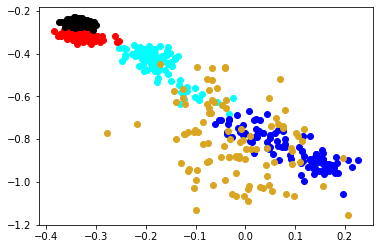

In [4]:
rn,wn = [],[]
for i in tqdm.tqdm(range(100)):
    r = chi.cNoise(2,[2**13])
    g1c = GPA1D.scalingLaw(r,"G1C",spaceFilling='snake')
    g1 = GPA1D.scalingLaw(r,"G1",spaceFilling='snake')
    g2 = GPA1D.scalingLaw(r,"G2",spaceFilling='snake')
    g3 = GPA1D.scalingLaw(r,"G3",spaceFilling='snake')
    rn.append({"G1C":g1c,"G1":g1,"G2":g2,"G3":g3})
    
    w = chi.cNoise(0,[2**13])
    g1c = GPA1D.scalingLaw(r,"G1C",spaceFilling='snake')
    g1 = GPA1D.scalingLaw(w,"G1",spaceFilling='snake')
    g2 = GPA1D.scalingLaw(w,"G2",spaceFilling='snake')
    g3 = GPA1D.scalingLaw(w,"G3",spaceFilling='snake')
    wn.append({"G1C":g1c,"G1":g1,"G2":g2,"G3":g3})

rn = pd.DataFrame(rn)
wn = pd.DataFrame(wn)

plt.figure()
plt.scatter(endo["G1"],endo["G2"],color='cyan')
plt.scatter(exo["G1"],exo["G2"],color='blue')
plt.scatter(lor["G1"],lor["G2"],color='goldenrod')
plt.scatter(rn["G1"],rn["G2"],color='red')
plt.scatter(wn["G1"],wn["G2"],color='black')
plt.show()

In [5]:
endo.to_csv("endo_s_3_17_2.csv", index=False)
exo.to_csv("exo_s_3_17_2.csv", index=False)
lor.to_csv("lor_s_3_17_2.csv", index=False)
rn.to_csv("rn_s_3_17_2.csv", index=False)

In [19]:
endo = pd.read_csv("endo_s_3_17_2.csv")
exo = pd.read_csv("exo_s_3_17_2.csv")
lor = pd.read_csv("lor_s_3_17_2.csv")
rn = pd.read_csv("rn_s_3_17_2.csv")

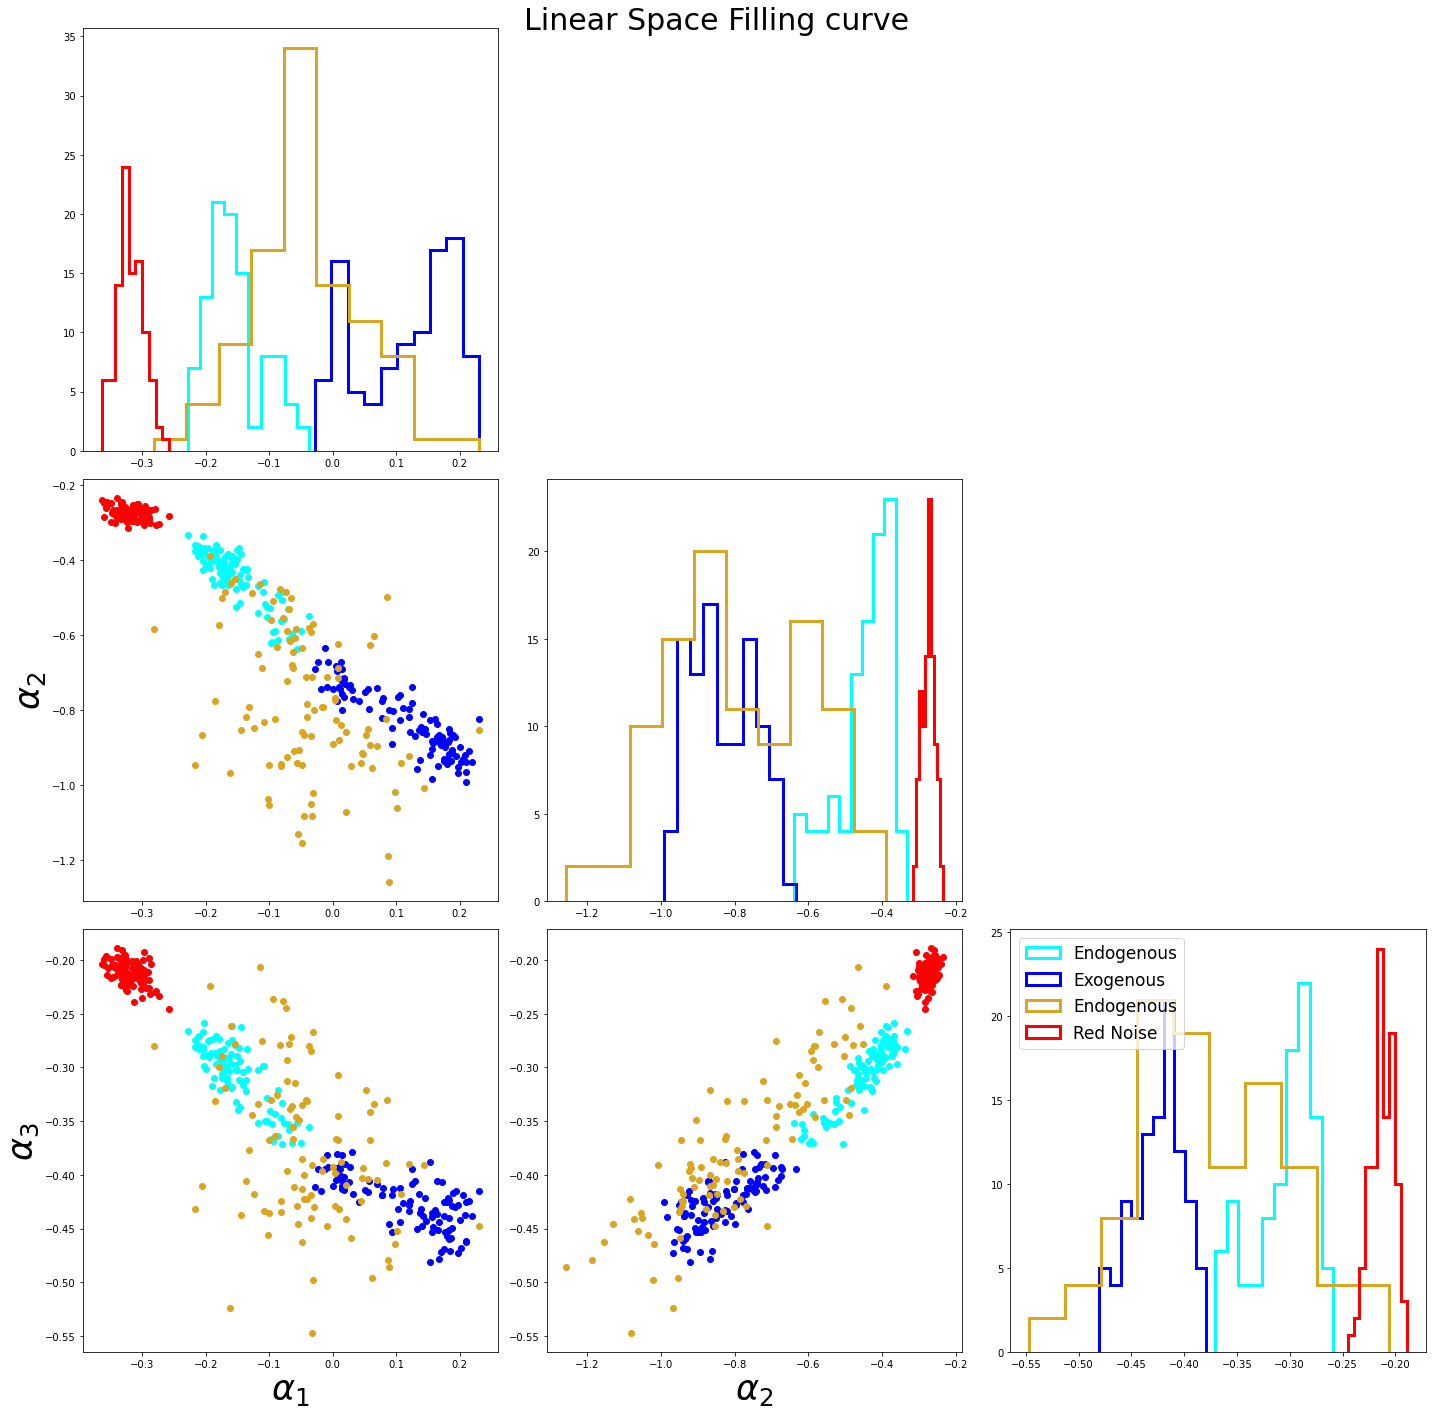

In [20]:
plt.figure(figsize=(20,20))
for i in range(3):
    for j in range(3):
        if i<j:
            plt.subplot(3,3,i+3*j+1)
            plt.scatter(endo[f"G{i+1}"],endo[f"G{j+1}"],color='cyan',label='Endogenous')
            plt.scatter(exo[f"G{i+1}"],exo[f"G{j+1}"],color='blue',label='Exogenous')
            plt.scatter(lor[f"G{i+1}"],lor[f"G{j+1}"],color='goldenrod',label='Endogenous')
            plt.scatter(rn[f"G{i+1}"],rn[f"G{j+1}"],color='red',label='Red Noise')
            #plt.scatter(wn["G1"],wn["G2"],color='black')
            if j==2:
                plt.xlabel(fr"$\alpha_{i+1}$",fontsize=35)
            if i==0:
                plt.ylabel(fr"$\alpha_{j+1}$",fontsize=35)
        if i==j:
            plt.subplot(3,3,i+3*j+1)
            plt.hist(endo[f"G{i+1}"],color='cyan',label='Endogenous',histtype='step',lw=3)
            plt.hist(exo[f"G{i+1}"],color='blue',label='Exogenous',histtype='step',lw=3)
            plt.hist(lor[f"G{i+1}"],color='goldenrod',label='Endogenous',histtype='step',lw=3)
            plt.hist(rn[f"G{i+1}"],color='red',label='Red Noise',histtype='step',lw=3)
            #plt.scatter(wn["G1"],wn["G2"],color='black')
            #plt.title(fr"$\alpha_{j+1}$",fontsize=25)
plt.legend(fontsize=17)
plt.suptitle("Linear Space Filling curve",fontsize=30)
plt.tight_layout()

plt.show()

In [7]:
sw = chi.get_SolarWind()
ssw = chi.get_SurrogateSolarWind()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


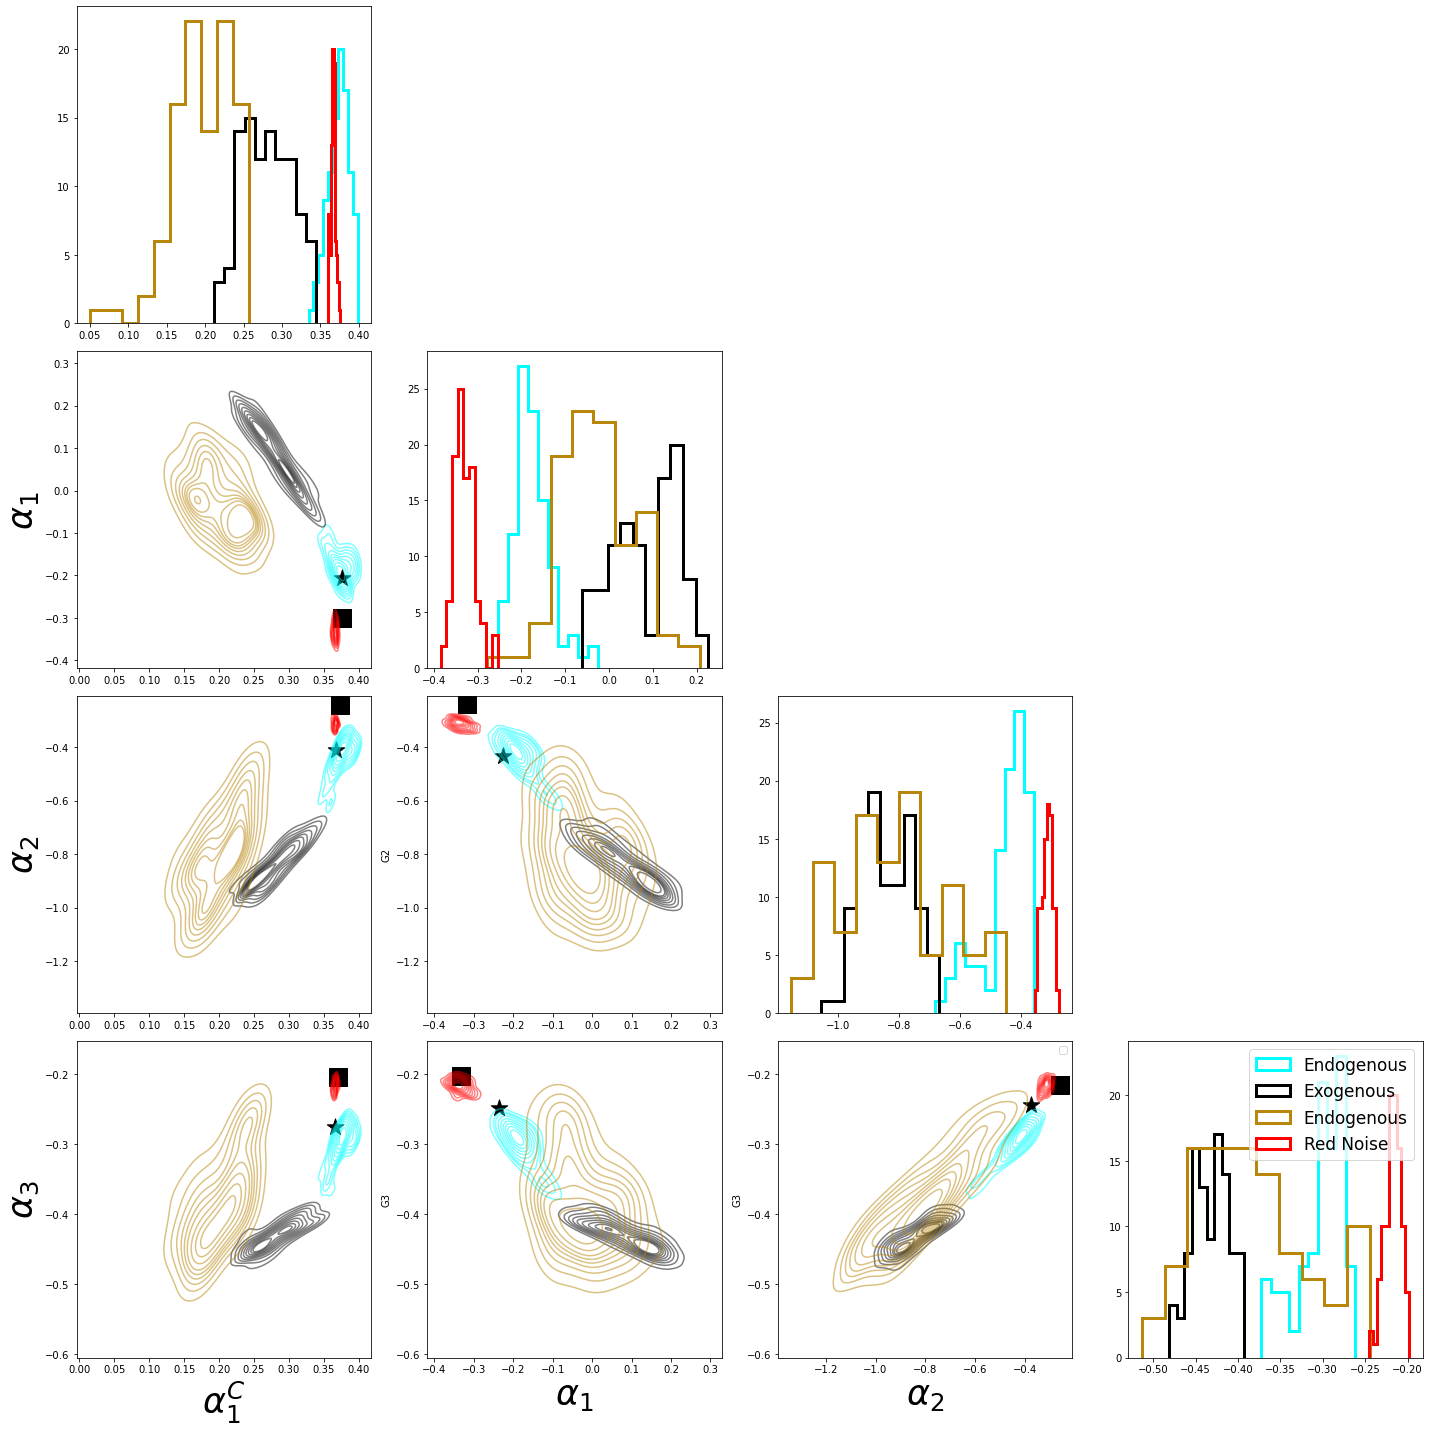

In [9]:
plt.figure(figsize=(20,20))

gress = ['G1C','G1','G2','G3']
labels = [f'_1^C',f'_1',f'_2',f'_3']

for i in range(4):
    for j in range(4):
        if ((i==3) and (j==0)):
            plt.legend()
        if i<j:
            plt.subplot(4,4,i+4*j+1)
            sns.kdeplot(data=endo, x=gress[i], y=gress[j],fill=False,color='aqua',thresh=0.15,alpha = 0.5)
            sns.kdeplot(data=exo, x=gress[i], y=gress[j],fill=False,color='black',thresh=0.15,alpha = 0.5)
            sns.kdeplot(data=lor, x=gress[i], y=gress[j],fill=False,color='darkgoldenrod',thresh=0.15,alpha = 0.5)
            sns.kdeplot(data=rn, x=gress[i], y=gress[j],fill=False,color='red',thresh=0.15,alpha = 0.5)
            gx = GPA1D.scalingLaw(sw,gress[i],spaceFilling='snake')
            gy = GPA1D.scalingLaw(sw,gress[j],spaceFilling='snake')
            plt.scatter(gx,gy,marker='*',s=300, color='k')
            gx = GPA1D.scalingLaw(ssw,gress[i],spaceFilling='snake')
            gy = GPA1D.scalingLaw(ssw,gress[j],spaceFilling='snake')
            plt.scatter(gx,gy,marker='s',s=300, color='k')
            plt.title('')
            if j==0:
                plt.xlim(0.1,0.4)
            if j==3:
                plt.xlabel(fr"$\alpha"+labels[i]+"$",fontsize=35)
            else:
                plt.xlabel('')
            if i==0:
                plt.ylabel(fr"$\alpha"+labels[j]+"$",fontsize=35)
        if i==j:
            plt.subplot(4,4,i+4*j+1)
            plt.hist(endo[gress[i]],color='aqua',label='Endogenous',histtype='step',lw=3)
            plt.hist(exo[gress[i]],color='black',label='Exogenous',histtype='step',lw=3)
            plt.hist(lor[gress[i]],color='darkgoldenrod',label='Endogenous',histtype='step',lw=3)
            plt.hist(rn[gress[i]],color='red',label='Red Noise',histtype='step',lw=3)
            #plt.scatter(wn["G1"],wn["G2"],color='black')
            #plt.title(fr"$\alpha_{j+1}$",fontsize=25)
plt.legend(fontsize=17)
plt.tight_layout()

plt.show()